# Analisando a Base de Dados Airline Passenger Satisfaction

## This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger? Can you predict passenger satisfaction?

### Content
Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

Note that this data set was modified from this dataset by John D here. It has been cleaned up for the purposes of classification.

In [1]:
#importando as bibliotecas
import sklearn.metrics  
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

In [2]:
#carregando o Dataset de treino e teste
train = pd.read_csv ("APS_treino.csv", sep = ',')

#carregando Dataset de Teste (80-20%)
test = pd.read_csv ('APS.csv', sep=',')


In [3]:
#tipos de dados
train.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [4]:
#Removendo a Coluna ID e Unnamed
train.drop(columns=['id', 'Unnamed: 0'], inplace=True)
test.drop(columns=['id', 'Unnamed: 0'], inplace=True)

In [5]:
#Começando a Análise Exploratória
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
#dados estatísticos de cada coluna
train.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [7]:
#analisando a base de dados: 129.880 linhas e 23 colunas (removidas Unnamed e ID)
print(train.shape)
print(test.shape)

(103904, 23)
(25976, 23)


### Curiosidades:
### No Dataset Treino, o tempo máximo de atraso na partida dos voos foi de 1592 min = 26h 32min, já a média de atraso foi de 14min 48s
### Idade máxima de 85 anos e mínima de 7 anos
### Maior distância do voo foi de 4983 milhas e menor 31 milhas. Média de distância dos voos foi de 1189,45 milhas.

### No Dataset Teste, o tempo máximo de atraso para a partida do avião foi de 1128 min = 18 h 48 min, a média de atraso foi de 14 min 18 s
### Idade máxima e distâncias do voo se mantiveram iguais

### Isso mostra que as bases foram muito bem separadas em treino 80% e teste 20%


In [8]:
#transformando o Satisfaction em valores binários 0 e 1
#transformando o Churn em valores binários 0 e 1
train_mod = train.copy()
test_mod = test.copy()
train_mod['satisfaction'].replace(['neutral or dissatisfied', 'satisfied'],[0,1], inplace=True)
test_mod['satisfaction'].replace(['neutral or dissatisfied', 'satisfied'],[0,1], inplace = True)

In [9]:
#Número de Mulheres e Homens das Bases de Treino
total =  train_mod['Gender'].count()
count_m = 0
for x in train_mod['Gender']:
    if x == 'Female':
        count_m += 1
print ('O percentual de mulheres é: ', round((count_m/total)*100,2), '%')        
count_h = 0
for x in train['Gender']:
    if x == 'Male':
        count_h += 1
print ('O percentual de homens é: ', round((count_h/total)*100,2), '%')    



O percentual de mulheres é:  50.75 %
O percentual de homens é:  49.25 %


### Na Base de teste também temos o mesmo perceentual e mulheres e homens.

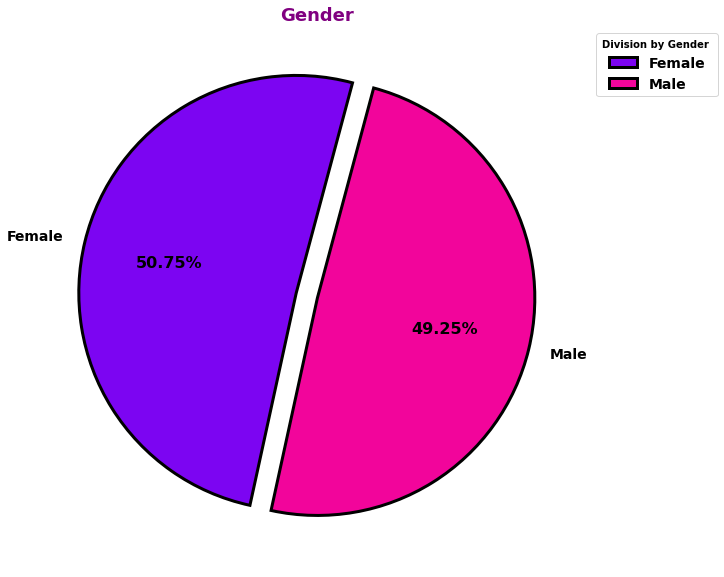

In [10]:
#gráfico de pizza
genero = ['Female', 'Male' ] 
  
data = [50.75,49.25]
  
colors = ['#7c05f2',"#f2059b"  ]
explode = (0.1 , 0)
wp = { 'linewidth': 3, 'edgecolor' : "black" } 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.2f}%".format(pct, absolute) 
fig20, ax = plt.subplots(figsize =(15, 10))
wedges, texts, autotexts = ax.pie(data,  
                                  autopct = lambda pct: func(pct, data), 
                                  labels = genero, 
                                  explode = explode,
                                  colors= colors,
                                  shadow = False, 
                                  startangle = 75, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ='black', fontsize=14)) 
ax.legend(wedges, genero, 
          fontsize = 14,
          title ="Division by Gender ", 
          loc ="upper left", 
          bbox_to_anchor =(1, 0, 0.8, 1)) 
  
plt.setp(autotexts, size = 16, weight ="bold") 
ax.set_title("Gender", loc= 'center', fontsize = 18, color = 'purple',weight ="bold") 
plt.show() 
fig20.savefig("pizza_h_m.png")

### Como ficou evidente o número de mulheres e homens está muito bem distribuído, praticamente 50/50, logo a separação por gênero, para futuras análises não se faz necessária. Temos um grupo muito homogêneo 

In [11]:
#Correlação das variáveis input com a Satisfação (target)
train_mod.corrwith(train_mod["satisfaction"]).sort_values(ascending=False)

satisfaction                         1.000000
Online boarding                      0.503557
Inflight entertainment               0.398059
Seat comfort                         0.349459
On-board service                     0.322383
Leg room service                     0.313131
Cleanliness                          0.305198
Flight Distance                      0.298780
Inflight wifi service                0.284245
Baggage handling                     0.247749
Inflight service                     0.244741
Checkin service                      0.236174
Food and drink                       0.209936
Ease of Online booking               0.171705
Age                                  0.137167
Gate location                        0.000682
Departure Delay in Minutes          -0.050494
Departure/Arrival time convenient   -0.051601
Arrival Delay in Minutes            -0.057582
dtype: float64

In [12]:
#renomeando as colunas do Dataframe Treino
train_mod = train_mod.rename(columns={ 'Customer Type':'Customer_Type','Type of Travel': 'Type_Travel',
'Flight Distance':'Distance_Miles','Inflight wifi service':'Wifi','Departure/Arrival time convenient':'D_A_Time', 
'Ease of Online booking':'Online_Booking', 'Gate location': 'Gate_Loc', 'Food and drink':'F_and_D', 'Online boarding': 'On_Boarding',
'Inflight entertainment': 'Entertainment', 'On-board service': 'Service', 'Seat comfort': 'Seat_Comfort',
'Leg room service': 'Leg_Space','Baggage handling':'Baggage_Handling', 'Checkin service': 'Checkin_Service',
'Inflight service':'Inflight_Service','Departure Delay in Minutes': 'Delay_Dep','Arrival Delay in Minutes': 'Delay_Arrival'
                                 })



In [13]:
#Renomeando as colunas do DataFrame de Teste
test_mod = test_mod.rename(columns={ 'Customer Type':'Customer_Type','Type of Travel': 'Type_Travel',
'Flight Distance':'Distance_Miles','Inflight wifi service':'Wifi','Departure/Arrival time convenient':'D_A_Time', 
'Ease of Online booking':'Online_Booking', 'Gate location': 'Gate_Loc', 'Food and drink':'F_and_D', 'Online boarding': 'On_Boarding',
'Inflight entertainment': 'Entertainment', 'On-board service': 'Service', 'Seat comfort': 'Seat_Comfort',
'Leg room service': 'Leg_Space','Baggage handling':'Baggage_Handling', 'Checkin service': 'Checkin_Service',
'Inflight service':'Inflight_Service','Departure Delay in Minutes': 'Delay_Dep','Arrival Delay in Minutes': 'Delay_Arrival'
                                 })

In [14]:
train_mod.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_Travel', 'Class',
       'Distance_Miles', 'Wifi', 'D_A_Time', 'Online_Booking', 'Gate_Loc',
       'F_and_D', 'On_Boarding', 'Seat_Comfort', 'Entertainment', 'Service',
       'Leg_Space', 'Baggage_Handling', 'Checkin_Service', 'Inflight_Service',
       'Cleanliness', 'Delay_Dep', 'Delay_Arrival', 'satisfaction'],
      dtype='object')

In [15]:
#Correlação Geral de todos variáveis
corr = round(train_mod.corr(),2)
corr

,Age,Distance_Miles,Wifi,D_A_Time,Online_Booking,Gate_Loc,F_and_D,On_Boarding,Seat_Comfort,Entertainment,Service,Leg_Space,Baggage_Handling,Checkin_Service,Inflight_Service,Cleanliness,Delay_Dep,Delay_Arrival,satisfaction
Age,1.00,0.10,0.02,0.04,0.02,-0.00,0.02,0.21,0.16,0.08,0.06,0.04,-0.05,0.04,-0.05,0.05,-0.01,-0.01,0.14
Distance_Miles,0.10,1.00,0.01,-0.02,0.07,0.00,0.06,0.21,0.16,0.13,0.11,0.13,0.06,0.07,0.06,0.09,0.00,-0.00,0.30
Wifi,0.02,0.01,1.00,0.34,0.72,0.34,0.13,0.46,0.12,0.21,0.12,0.16,0.12,0.04,0.11,0.13,-0.02,-0.02,0.28
D_A_Time,0.04,-0.02,0.34,1.00,0.44,0.44,0.00,0.07,0.01,-0.00,0.07,0.01,0.07,0.09,0.07,0.01,0.00,-0.00,-0.05
Online_Booking,0.02,0.07,0.72,0.44,1.00,0.46,0.03,0.40,0.03,0.05,0.04,0.11,0.04,0.01,0.04,0.02,-0.01,-0.01,0.17
Gate_Loc,-0.00,0.00,0.34,0.44,0.46,1.00,-0.00,0.00,0.00,0.00,-0.03,-0.01,0.00,-0.04,0.00,-0.00,0.01,0.01,0.00
F_and_D,0.02,0.06,0.13,0.00,0.03,-0.00,1.00,0.23,0.57,0.62,0.06,0.03,0.03,0.09,0.03,0.66,-0.03,-0.03,0.21
On_Boarding,0.21,0.21,0.46,0.07,0.40,0.00,0.23,1.00,0.42,0.29,0.16,0.12,0.08,0.20,0.07,0.33,-0.02,-0.02,0.50
Seat_Comfort,0.16,0.16,0.12,0.01,0.03,0.00,0.57,0.42,1.00,0.61,0.13,0.11,0.07,0.19,0.07,0.68,-0.03,-0.03,0.35
Entertainment,0.08,0.13,0.21,-0.00,0.05,0.00,0.62,0.29,0.61,1.00,0.42,0.30,0.38,0.12,0.40,0.69,-0.03,-0.03,0.40


In [16]:
#função para destacar o range do Dataframe, das maiores correlações
def highlight_cells(val, color_if_true, color_if_false):
    color = color_if_true if abs(val)>0.6 and abs(val)<1 else color_if_false
    return 'background-color: {}'.format(color)
corr.style.applymap(highlight_cells, color_if_true='orange', color_if_false='#bcbcbc')

,Age,Distance_Miles,Wifi,D_A_Time,Online_Booking,Gate_Loc,F_and_D,On_Boarding,Seat_Comfort,Entertainment,Service,Leg_Space,Baggage_Handling,Checkin_Service,Inflight_Service,Cleanliness,Delay_Dep,Delay_Arrival,satisfaction
Age,1.000000,0.100000,0.020000,0.040000,0.020000,-0.000000,0.020000,0.210000,0.160000,0.080000,0.060000,0.040000,-0.050000,0.040000,-0.050000,0.050000,-0.010000,-0.010000,0.140000
Distance_Miles,0.100000,1.000000,0.010000,-0.020000,0.070000,0.000000,0.060000,0.210000,0.160000,0.130000,0.110000,0.130000,0.060000,0.070000,0.060000,0.090000,0.000000,-0.000000,0.300000
Wifi,0.020000,0.010000,1.000000,0.340000,0.720000,0.340000,0.130000,0.460000,0.120000,0.210000,0.120000,0.160000,0.120000,0.040000,0.110000,0.130000,-0.020000,-0.020000,0.280000
D_A_Time,0.040000,-0.020000,0.340000,1.000000,0.440000,0.440000,0.000000,0.070000,0.010000,-0.000000,0.070000,0.010000,0.070000,0.090000,0.070000,0.010000,0.000000,-0.000000,-0.050000
Online_Booking,0.020000,0.070000,0.720000,0.440000,1.000000,0.460000,0.030000,0.400000,0.030000,0.050000,0.040000,0.110000,0.040000,0.010000,0.040000,0.020000,-0.010000,-0.010000,0.170000
Gate_Loc,-0.000000,0.000000,0.340000,0.440000,0.460000,1.000000,-0.000000,0.000000,0.000000,0.000000,-0.030000,-0.010000,0.000000,-0.040000,0.000000,-0.000000,0.010000,0.010000,0.000000
F_and_D,0.020000,0.060000,0.130000,0.000000,0.030000,-0.000000,1.000000,0.230000,0.570000,0.620000,0.060000,0.030000,0.030000,0.090000,0.030000,0.660000,-0.030000,-0.030000,0.210000
On_Boarding,0.210000,0.210000,0.460000,0.070000,0.400000,0.000000,0.230000,1.000000,0.420000,0.290000,0.160000,0.120000,0.080000,0.200000,0.070000,0.330000,-0.020000,-0.020000,0.500000
Seat_Comfort,0.160000,0.160000,0.120000,0.010000,0.030000,0.000000,0.570000,0.420000,1.000000,0.610000,0.130000,0.110000,0.070000,0.190000,0.070000,0.680000,-0.030000,-0.030000,0.350000
Entertainment,0.080000,0.130000,0.210000,-0.000000,0.050000,0.000000,0.620000,0.290000,0.610000,1.000000,0.420000,0.300000,0.380000,0.120000,0.400000,0.690000,-0.030000,-0.030000,0.400000


### A maior correlação com a variável Satisfação é o Online Boarding = 50,36%
### As variáeis Departure Delay in Minutes e Arrival Delay in Minutes possuem correlação de 96,55% entre elas.

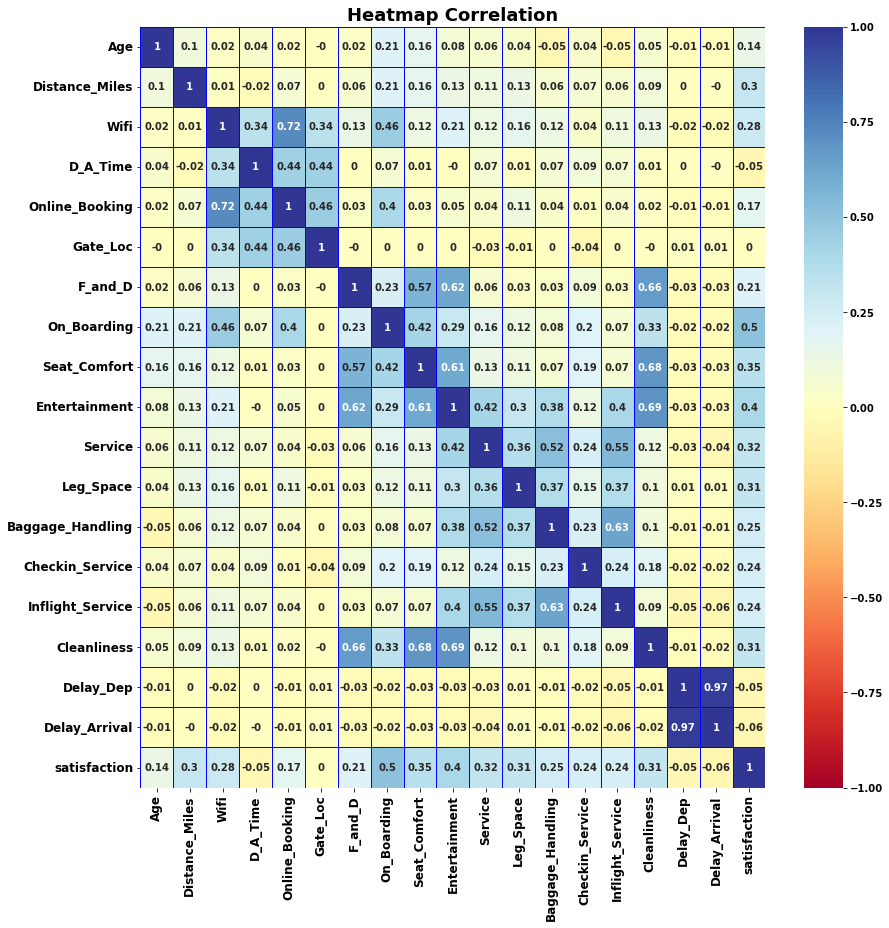

In [17]:
#Mapa de calor da correlação vmin=-1, vmax=1, annot=True, sns.set(font_scale=1)
#Observa-se que o satisfaction possue correlação baixa com quase todas as variáveis. Todas correlação menores que 50%
#Heatmap Correlação
fig10, ax = plt.subplots(figsize=(14,14))
sns.heatmap(corr, linewidths=0.5,vmin = -1, vmax=1, annot= True, cmap="RdYlBu", ax=ax, linecolor='blue')
ax.set_title("Heatmap Correlation",fontdict={'size':18}, color = 'black')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize=12, color = 'black')
ax.set_yticklabels(ax.get_xticklabels(),rotation = 0,fontsize=12, color = 'black')
fig10.savefig("fig10.png")
plt.show()

In [18]:
#analisando valores faltantes e nulos
print(train_mod.isnull().sum())
#print(aps_teste.isnull().sum())


Gender                0
Customer_Type         0
Age                   0
Type_Travel           0
Class                 0
Distance_Miles        0
Wifi                  0
D_A_Time              0
Online_Booking        0
Gate_Loc              0
F_and_D               0
On_Boarding           0
Seat_Comfort          0
Entertainment         0
Service               0
Leg_Space             0
Baggage_Handling      0
Checkin_Service       0
Inflight_Service      0
Cleanliness           0
Delay_Dep             0
Delay_Arrival       310
satisfaction          0
dtype: int64


#### Só há dados faltantes na Coluna Arrival Delay in Minutes, na base de Treino temos 310 dados faltantes e nada base de Teste 83.
#### O Grupo decidiu por excluir a coluna Arrival Delay in Minutes, pois possui alta correlação com a Departure Delay in Minutes, que não tem dados faltantes e representam a mesma situação. Onde há atrasado na decolagem, também haverá atraso na chegada do voo de praticamente mesma dimensão.

In [19]:
#selecionando as colunas de interesse, removendo a coluna de atraso na chegada do voo.
train_mod = train_mod.loc[:,train_mod.columns!= 'Delay_Arrival']
train_mod.head()


,Gender,Customer_Type,Age,Type_Travel,Class,Distance_Miles,Wifi,D_A_Time,Online_Booking,Gate_Loc,...,Seat_Comfort,Entertainment,Service,Leg_Space,Baggage_Handling,Checkin_Service,Inflight_Service,Cleanliness,Delay_Dep,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,1


In [20]:
#Fazendo analises
#Numero de Pessoas Satisfeita
total = train_mod.query ("satisfaction").count()
satis = train_mod.query ("satisfaction == 1").count()
inst = train_mod.query ("satisfaction == 0").count()
print('O grau de satisfação é :',round((satis["satisfaction"]/total["satisfaction"])*100,2), '%')
print('O grau de insatisfação é:', round((inst["satisfaction"]/total["satisfaction"])*100,2), '%')

O grau de satisfação é : 43.33 %
O grau de insatisfação é: 56.67 %


<AxesSubplot:>

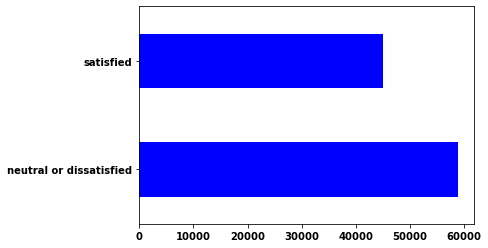

In [21]:
train["satisfaction"].value_counts().plot(kind="barh", color ='blue')

In [22]:
#Idade x Satisfação
#Definir uma função para cluster de RFV (dos menos engajados aos mais engajados, em função do score RFV)
def FMCG_rfm_level(df):
    if df['Age'] <= 18:
        return 'Until_18'
    elif ((df['Age'] > 18) and (df['Age'] <=59)):
        return '19-59'
    else:
        return 'Eldery(60+)'
# Cria uma nova variável para cluster de RFV
train_mod['Age_grouped'] = train_mod.apply(FMCG_rfm_level, axis=1)
# Printing the header with top 15 rows 
train_mod.head(10)

,Gender,Customer_Type,Age,Type_Travel,Class,Distance_Miles,Wifi,D_A_Time,Online_Booking,Gate_Loc,...,Entertainment,Service,Leg_Space,Baggage_Handling,Checkin_Service,Inflight_Service,Cleanliness,Delay_Dep,satisfaction,Age_grouped
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,0,Until_18
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,0,19-59
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,1,19-59
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,0,19-59
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,1,Eldery(60+)
5,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,...,1,3,4,4,4,4,1,0,0,19-59
6,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,...,2,3,3,4,3,5,2,9,0,19-59
7,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,...,5,5,5,5,4,5,4,4,1,19-59
8,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,2,...,1,1,2,1,4,1,2,0,0,19-59
9,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,3,4,...,2,2,3,4,4,3,2,0,0,19-59


In [23]:
#Porcentagem de Idade
idade_18 = train_mod.query ("Age_grouped == 'Until_18'").count()
idade_19_59 = train_mod.query ("Age_grouped == '19-59'").count()
idade_60 = train_mod.query ("Age_grouped == 'Eldery(60+)'").count()
print('O percentual de Adolescentes que responderam a pesquisa:', round((idade_18['Age_grouped']/103904)*100,2), '%')
print('O percentual de  Adultos que responderam a pesquisa é:',round((idade_19_59['Age_grouped']/103904)*100,2), '%')
print('O percentual de Idosos que responderam a pesquisa:',round((idade_60['Age_grouped']/103904)*100,2), '%')

O percentual de Adolescentes que responderam a pesquisa: 8.57 %
O percentual de  Adultos que responderam a pesquisa é: 82.07 %
O percentual de Idosos que responderam a pesquisa: 9.35 %


array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

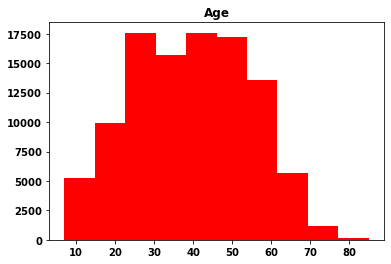

In [24]:
#Histograma da distribuição por idade
train.hist(column="Age", bins=10, grid=False, figsize=(6,4), color="red")

In [25]:
#Idade x Satisfação
i_18_s = train_mod.query ("Age_grouped == 'Until_18' & satisfaction == 1").count()
i_18_i = train_mod.query ("Age_grouped == 'Until_18' & satisfaction == 0").count()
i_59_s = train_mod.query ("Age_grouped == '19-59' & satisfaction == 1").count()
i_59_i = train_mod.query ("Age_grouped == '19-59' & satisfaction == 0").count()
i_60_s = train_mod.query ("Age_grouped == 'Eldery(60+)' & satisfaction == 1").count()
i_60_i = train_mod.query ("Age_grouped == 'Eldery(60+)' & satisfaction == 0").count()
print('O grau de satisfação até 18 anos é :',round((i_18_s['Age_grouped']/idade_18['Age_grouped'])*100,2), '%')
print('O grau de insatisfação até 18 anos é:', round((i_18_i['Age_grouped']/idade_18['Age_grouped'])*100,2), '%')
print('O grau de satisfação dos Adultos é:',round((i_59_s['Age_grouped']/idade_19_59['Age_grouped'])*100,2), '%')
print('O grau de insatisfação dos Adultos é: ',round((i_59_i['Age_grouped']/idade_19_59['Age_grouped'])*100,2), '%')
print('O grau de satisfação dos Idosos é:',round((i_60_s['Age_grouped']/idade_60['Age_grouped'])*100,2), '%')
print('O grau de insatisfação dos Idosos é:',round((i_60_i['Age_grouped']/idade_60['Age_grouped'])*100,2), '%')


O grau de satisfação até 18 anos é : 17.27 %
O grau de insatisfação até 18 anos é: 82.73 %
O grau de satisfação dos Adultos é: 47.9 %
O grau de insatisfação dos Adultos é:  52.1 %
O grau de satisfação dos Idosos é: 27.12 %
O grau de insatisfação dos Idosos é: 72.88 %


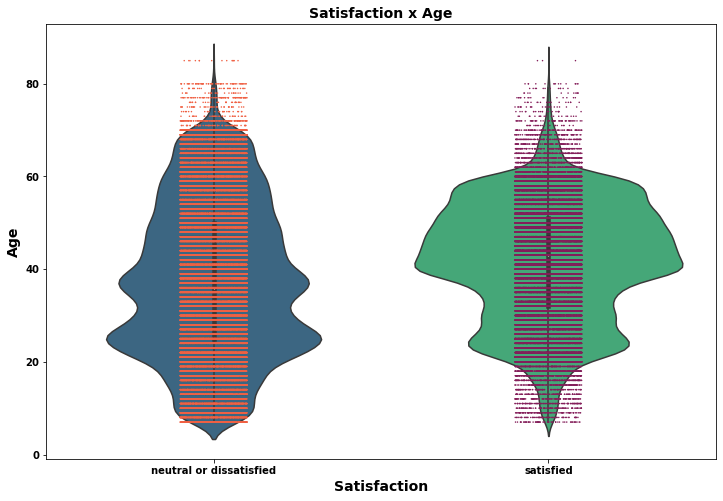

In [87]:
#Violinplot da Idade x Sastisfação
fig11 = plt.figure(figsize=(12,8))
sns.violinplot(x='satisfaction',y='Age',data=train, palette= 'viridis')
sns.stripplot(x='satisfaction',y='Age',data=train,size=1.5,palette='rocket_r')
plt.title('Satisfaction x Age', fontsize = 14)
plt.xlabel('Satisfaction', fontsize= 14)
plt.ylabel('Age', fontsize = 14)
fig11.savefig("satisfacao_idade.png")
plt.show()

### Fica notório que as pessoas mais satisfeitas são os adultos, e ao contrário, as pessoas idosas parecem mais insatisfeitas. Como havia sido calculado anteriormente o grau de satisfação dos Adultos =  47.9 %. E o grau de instaisfação dos Idosos é de 72,88% e dos adolescentes é de 82,73%

In [27]:
#Avaliando Influência da variável Gate nos Idosos
s_idosos = train_mod[['Age_grouped','Wifi', 'D_A_Time', 'Online_Booking', 'Gate_Loc',
'F_and_D', 'On_Boarding', 'Seat_Comfort','Entertainment', 'Service', 'Leg_Space', 'Baggage_Handling',
'Checkin_Service', 'Inflight_Service', 'Cleanliness'
                     ]]
filtro_idosos = s_idosos.query ("Age_grouped == 'Eldery(60+)'") 
filtro_idosos.describe()

,Wifi,D_A_Time,Online_Booking,Gate_Loc,F_and_D,On_Boarding,Seat_Comfort,Entertainment,Service,Leg_Space,Baggage_Handling,Checkin_Service,Inflight_Service,Cleanliness
count,9719.000000,9719.000000,9719.000000,9719.000000,9719.000000,9719.000000,9719.000000,9719.000000,9719.000000,9719.000000,9719.000000,9719.000000,9719.000000,9719.000000
mean,2.613540,3.315156,2.671983,2.944336,3.119045,3.255993,3.423809,3.173269,3.213396,3.079432,3.364441,3.200432,3.379257,3.166169
std,1.231509,1.460873,1.353776,1.250186,1.334753,1.282053,1.253820,1.347603,1.324233,1.328239,1.295470,1.268354,1.273071,1.305892
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000
75%,3.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


#### Para os idosos precisamos melhorar os itens:
#### Serviço de Wifi, Reserva Online, Portão de Embarque, Espaço dos pés e todos os outros manter o padrão

In [28]:
#Avaliando Influência da variável Gate nos Idosos
s_jovens = train_mod[['Age_grouped','Wifi', 'D_A_Time', 'Online_Booking', 'Gate_Loc',
'F_and_D', 'On_Boarding', 'Seat_Comfort','Entertainment', 'Service', 'Leg_Space', 'Baggage_Handling',
'Checkin_Service', 'Inflight_Service', 'Cleanliness'
                     ]]
filtro_jovens = s_jovens.query ("Age_grouped == 'Until_18'") 
filtro_jovens.describe()

,Wifi,D_A_Time,Online_Booking,Gate_Loc,F_and_D,On_Boarding,Seat_Comfort,Entertainment,Service,Leg_Space,Baggage_Handling,Checkin_Service,Inflight_Service,Cleanliness
count,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000
mean,2.590190,3.329779,2.591424,2.971714,3.042205,2.626221,3.006174,3.070939,3.205074,3.206533,3.675272,3.200584,3.693232,3.058256
std,1.200246,1.490771,1.320318,1.169074,1.358426,1.308469,1.376672,1.355988,1.272412,1.325291,1.084216,1.284277,1.078976,1.361507
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000
50%,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000
75%,3.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


#### Para os Jovens precisamos melhorar os itens:
#### Serviço de Wifi, Reserva Online, Portão de Embarque, Comida e Bebida, Embarque Online, Entretenimento no Voo 

In [29]:
#Definir uma função para clustererização do atraso
def FMCG_rfm_level(df):
    if df['Delay_Dep'] <= 15:
        return 'Acceptable_15min'
    elif ((df['Delay_Dep'] > 15) and (df['Delay_Dep'] < 60)):
        return 'Until_1h'
    elif ((df['Delay_Dep'] >= 60) and (df['Delay_Dep'] < 120)):
        return '1_until_2h'
    else:
        return 'Above_2h'
# Cria uma nova variável para cluster de RFV
train_mod['Delay_grouped'] = train_mod.apply(FMCG_rfm_level, axis=1)
# Imprimindo até 5 linhas 
train_mod.head()

,Gender,Customer_Type,Age,Type_Travel,Class,Distance_Miles,Wifi,D_A_Time,Online_Booking,Gate_Loc,...,Service,Leg_Space,Baggage_Handling,Checkin_Service,Inflight_Service,Cleanliness,Delay_Dep,satisfaction,Age_grouped,Delay_grouped
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,4,3,4,4,5,5,25,0,Until_18,Until_1h
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,5,3,1,4,1,1,0,19-59,Acceptable_15min
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,4,3,4,4,4,5,0,1,19-59,Acceptable_15min
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,5,3,1,4,2,11,0,19-59,Acceptable_15min
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,4,4,3,3,3,0,1,Eldery(60+),Acceptable_15min


In [30]:
#quantidades de atraso maior que a média
atraso_15 = train_mod.query ("Delay_grouped == 'Acceptable_15min'").count()
atraso_15_60 = train_mod.query ("Delay_grouped == 'Until_1h'").count()
atraso_1_2 = train_mod.query ("Delay_grouped == '1_until_2h'").count()
atraso_maior_2 = train_mod.query ("Delay_grouped == 'Above_2h'").count()

print('O percentual de atraso até 15 min é :',round((atraso_15['Delay_grouped']/103904)*100,2), '%')
print('O percentual de atraso de 15 min até 1 h é:', round((atraso_15_60['Delay_grouped']/103904)*100,2), '%')
print('O percentual de atraso de 1 h até 2 hs é:',round((atraso_1_2['Delay_grouped']/103904)*100,2), '%')
print('O percentual de atraso de 2 hs ou + :',round((atraso_maior_2['Delay_grouped']/103904)*100,2), '%')


O percentual de atraso até 15 min é : 77.81 %
O percentual de atraso de 15 min até 1 h é: 15.07 %
O percentual de atraso de 1 h até 2 hs é: 4.63 %
O percentual de atraso de 2 hs ou + : 2.48 %


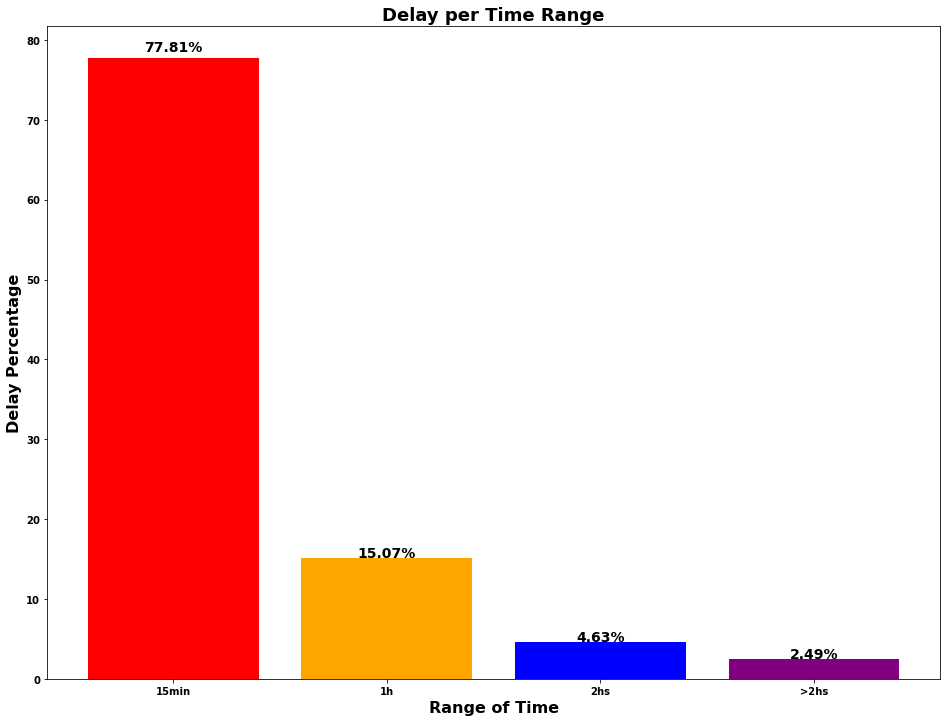

In [31]:
#Gráfico de Barra
fig19, ax = plt.subplots(figsize =(16, 12)) 
time = ['15min', '1h', '2hs', '>2hs'] 
colors_list = ['Red','Orange', 'Blue', 'Purple'] 
data = [77.81, 15.07, 4.63,  2.49] 
plt.xlabel ('Range of Time', fontsize = 16)
plt.ylabel ('Delay Percentage', fontsize = 16)
plt.title ('Delay per Time Range', fontsize = 18)

 


graph = plt.bar(time,data, color = colors_list)

 
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(data[i])+'%',
             ha='center',
             weight='bold',
            fontsize = 14)
    i+=1
plt.show()
fig19.savefig("barra_atraso.png")

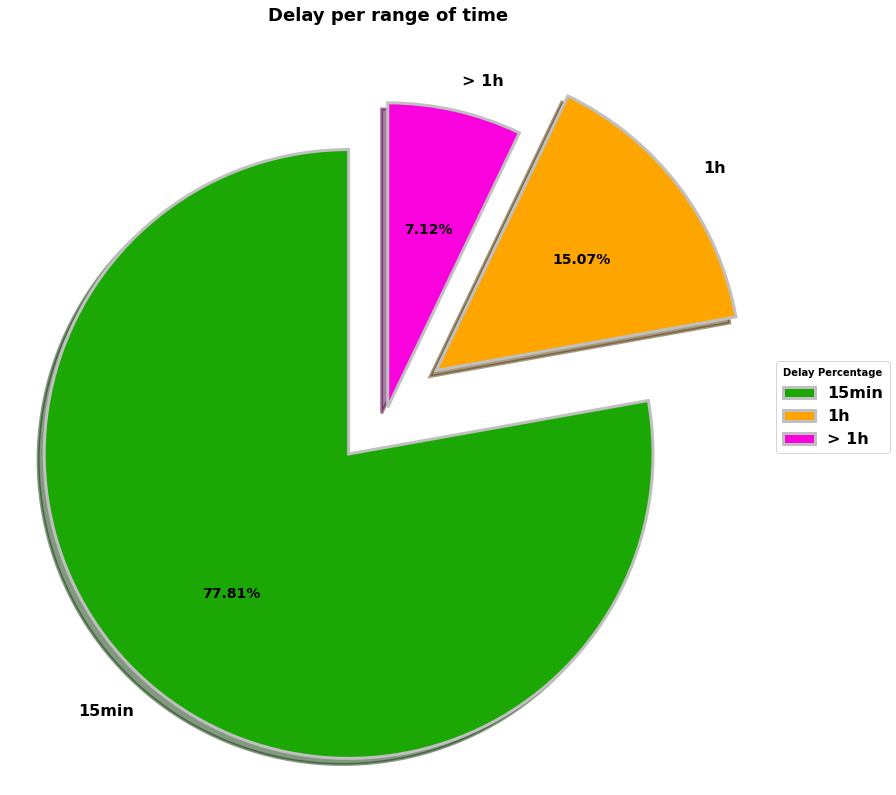

In [32]:
#Grafico de Pizza Percentual de Atraso, Outra forma de visualizar o atraso
##222222 no google para ver as cores hexadecimais
time = ['15min', '1h', '> 1h'] 
data = [77.81, 15.07, 7.12] 
  
colors = ['#1ba805',"orange",'#fa02dd']
explode = (0.2 ,0.2 , 0)          
wp = { 'linewidth' : 3, 'edgecolor' : "silver" } 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.2f}%".format(pct, absolute) 
fig7, ax = plt.subplots(figsize =(14, 14)) 
wedges, texts, autotexts = ax.pie(data, 
                                  autopct = lambda pct: func(pct, data), 
                                  labels = time, 
                                  explode = explode,
                                  colors= colors,
                                  shadow = True, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black", fontsize=16)) 
ax.legend(wedges, time, fontsize= 16, 
          title ="Delay Percentage", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 
  
plt.setp(autotexts, size = 14, weight ="bold") 
ax.set_title("Delay per range of time", loc= 'center', fontsize = 18, color = 'black') 
plt.show() 
fig7.savefig("pizza_atraso.png")

### Pecebe-se que a companhia se mostrou eficiênte em relação a gestão de tempo. Os atrasos predominam na região de até 15 min = 77,81%, e na região de até 1 hora com 15,07%. Logo o Total massivo de atraso está em até 1 hora com 92,08% do total de atrasos, o que é aceitável e não causa tanta insatisfação

In [33]:
#Atraso x Satifação
a_15_s = train_mod.query ("Delay_grouped == 'Acceptable_15min' & satisfaction == 1").count()
a_15_i = train_mod.query ("Delay_grouped == 'Acceptable_15min' & satisfaction == 0").count()
a_1h_s = train_mod.query ("Delay_grouped == 'Until_1h' & satisfaction == 1").count()
a_1h_i = train_mod.query ("Delay_grouped == 'Until_1h' & satisfaction == 0").count()
a_2h_s = train_mod.query ("Delay_grouped == '1_until_2h' & satisfaction == 1").count()
a_2h_i = train_mod.query ("Delay_grouped == '1_until_2h' & satisfaction == 0").count()
a_4h_s = train_mod.query ("Delay_grouped == 'Above_2h' & satisfaction == 1").count()
a_4h_i = train_mod.query ("Delay_grouped == 'Above_2h' & satisfaction == 0").count()

print('Atraso até 15 min e satisfeito é :',round((a_15_s['Delay_grouped']/atraso_15['Delay_grouped'])*100,2), '%')
print('Atraso até 15 min e insatisfeito é:', round((a_15_i['Delay_grouped']/atraso_15['Delay_grouped'])*100,2), '%')
print('Atraso de até 1 h e satisfeito é:',round((a_1h_s['Delay_grouped']/atraso_15_60['Delay_grouped'])*100,2), '%')
print('Atraso de até 1 h e insatisfeito é:',round((a_1h_i['Delay_grouped']/atraso_15_60['Delay_grouped'])*100,2), '%')
print('Atraso de até 2 hs e satisfeito é: ',round((a_2h_s['Delay_grouped']/atraso_1_2['Delay_grouped'])*100,2), '%')
print('Atraso de até 2 hs e insatisfeito é: ',round((a_2h_i['Delay_grouped']/atraso_1_2['Delay_grouped'])*100,2), '%')
print('Atraso acima de 2 hs e satisfeito é:',round((a_4h_s['Delay_grouped']/atraso_maior_2['Delay_grouped'])*100,2), '%')
print('Atraso acima de 2 hs e insatisfeito é:',round((a_4h_i['Delay_grouped']/atraso_maior_2['Delay_grouped'])*100,2), '%')


Atraso até 15 min e satisfeito é : 45.18 %
Atraso até 15 min e insatisfeito é: 54.82 %
Atraso de até 1 h e satisfeito é: 37.35 %
Atraso de até 1 h e insatisfeito é: 62.65 %
Atraso de até 2 hs e satisfeito é:  35.65 %
Atraso de até 2 hs e insatisfeito é:  64.35 %
Atraso acima de 2 hs e satisfeito é: 36.19 %
Atraso acima de 2 hs e insatisfeito é: 63.81 %


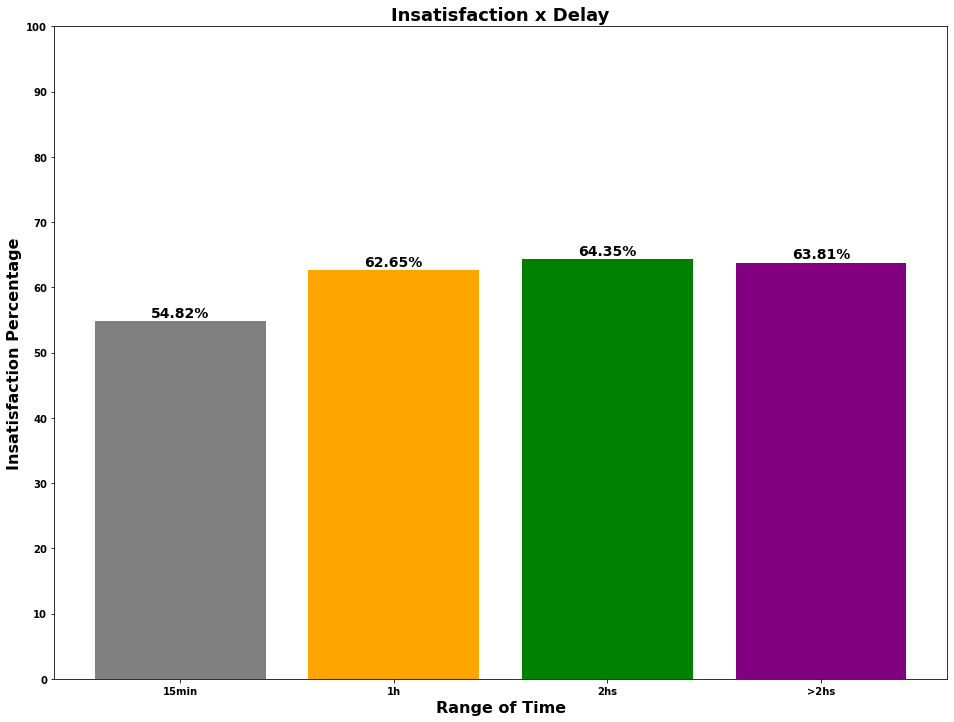

In [34]:
#Gráfico de Barra
fig25, ax = plt.subplots(figsize =(16, 12)) 
t1 = ['15min', '1h','2hs', '>2hs'] 
colors_list = ['gray','Orange', 'green', 'Purple'] 
s = [0, 10, 20, 30, 40, 50, 60, 70, 70, 90, 100]
ins = [54.82,62.65, 64.35, 63.81 ]
plt.xlabel ('Range of Time', fontsize = 16)
plt.ylabel ('Insatisfaction Percentage', fontsize = 16)
plt.title ('Insatisfaction x Delay', fontsize = 18)
graph = plt.bar(t1,ins, color = colors_list)
 
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(ins[i])+'%',
             ha='center',
             weight='bold',
            fontsize = 14)
    i+=1
plt.yticks (range(0,110,10))
plt.show()

fig25.savefig("barra_atraso_satisfacao.png")

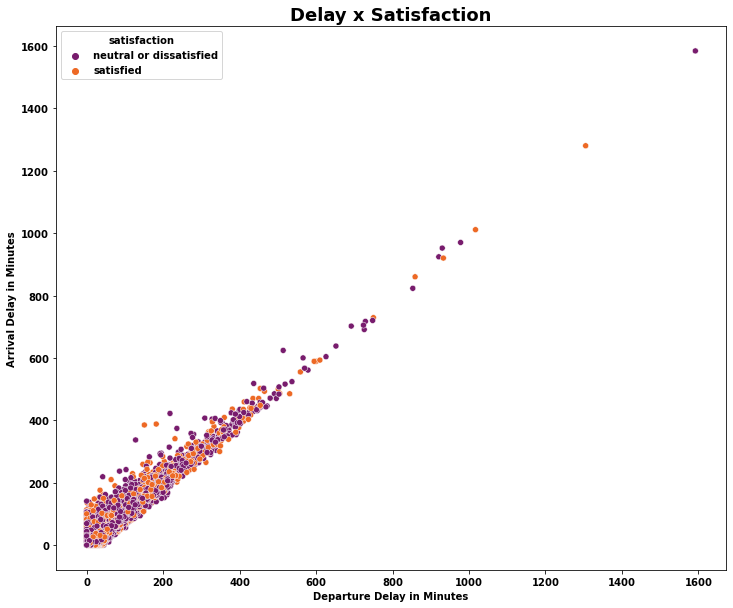

In [35]:
#Fazendo um scatterplot da Satisfação com o Atraso

fig4, ax = plt.subplots(figsize =(12, 10)) 
sns.scatterplot(x='Departure Delay in Minutes',y='Arrival Delay in Minutes',data=train,hue='satisfaction',palette='inferno')
plt.title('Delay x Satisfaction', fontsize = 18)
plt.show()
fig4.savefig("scatter_satis_atraso.png")

### Como podemos visualizar, muitos passageiros estão insatisfeitos, mesmo aqueles que não tiveram atraso na chegada do voo.

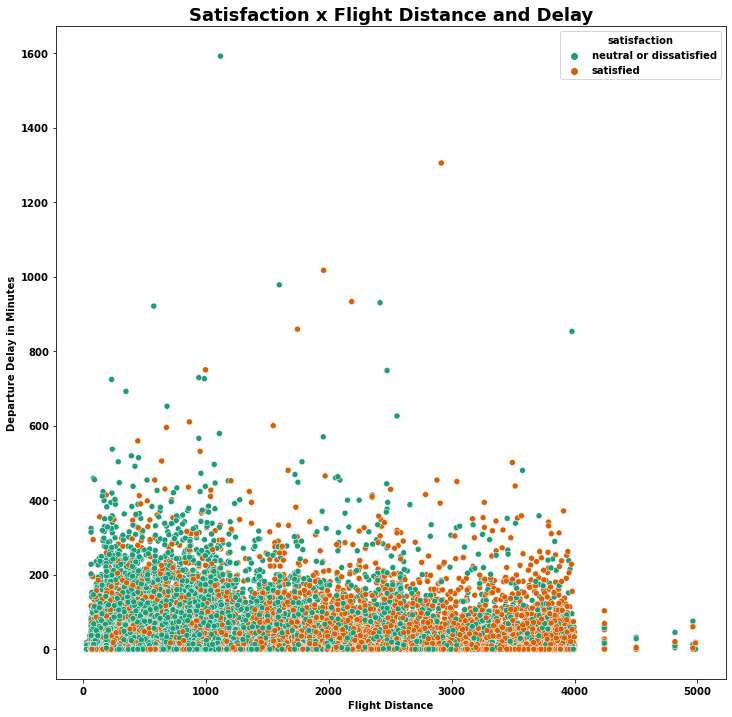

In [36]:
#Fazendo um scatterplot da Satisfação com o Atraso..#, hue=.
#Plotando a reta ajustada na nuvem de pontos
fig6, ax = plt.subplots(figsize =(12, 12)) 
sns.scatterplot(data=train, x="Flight Distance", y="Departure Delay in Minutes", hue = 'satisfaction', palette='Dark2')
plt.title( 'Satisfaction x Flight Distance and Delay',fontsize = 18)
plt.show()
fig6.savefig("scatterplotDA.png")

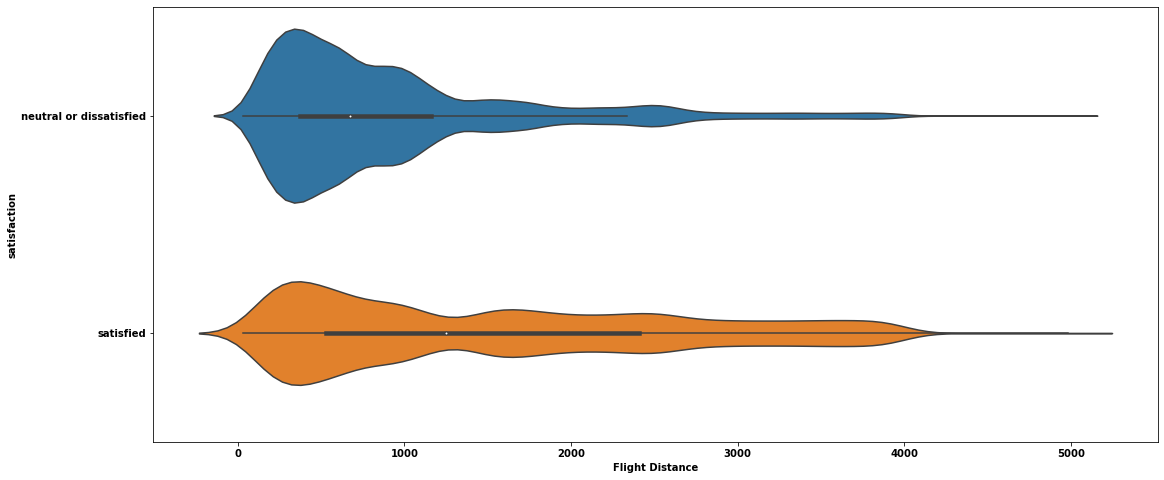

In [37]:
fig12,ax = plt.subplots(figsize =(12, 8)) 
fig12.set_figwidth(18)
sns.violinplot(x='Flight Distance', data=train,y='satisfaction')
fig12.savefig("violinplot_distancia.png")

### Constata-se que a distância do voo não influência na satisfação dos passageiros, pelo contrário em voos mais longos os passafeiros estão mais satisfeitos com o mesmo nível de atraso que em voos mais curtos. A Maioria dos voos longos foram satisfatórios.

In [38]:
#Fazendo analises
#Homem Leal x Classe
l_eco = train_mod.query ("Class == 'Eco' & Customer_Type =='Loyal Customer'").count()
l_eco_plus = train_mod.query ("Class == 'Eco Plus' & Customer_Type =='Loyal Customer'").count()
l_business = train_mod.query ("Class == 'Business' & Customer_Type =='Loyal Customer'").count()
#Homem x cliente infiel x Classe
d_eco = train_mod.query ("Class == 'Eco' & Customer_Type =='disloyal Customer'").count()
d_eco_plus = train_mod.query (" Class == 'Eco Plus' & Customer_Type =='disloyal Customer'").count()
d_business = train_mod.query ("Class == 'Business' & Customer_Type =='disloyal Customer'").count()

In [39]:
#Porcentagens, total = 103904
print('O percentual de pessoas loyal que viajaram de calsse Econômica é:',round((l_eco['satisfaction']/103904)*100,2), '%')
print('O percentual de pessoas loyal que viajaram de calsse Eco Plus é:', round((l_eco_plus['satisfaction']/103904)*100,2), '%')
print('O percentual de pessoas loyal que viajaram de calsse Busines é:',round((l_business['satisfaction']/103904)*100,2), '%')
print('O percentual de pessoas Disloyal que viajaram de calsse Econômica é:',round((d_eco['satisfaction']/103904)*100,2), '%')
print('O percentual de pessoas Disloyal que viajaram de calsse Eco Plus é:',round((d_eco_plus['satisfaction']/103904)*100,2), '%')
print('O percentual de pessoas Disloyal que viajaram de calsse Business é:',round((d_business['satisfaction']/103904)*100,2), '%')


O percentual de pessoas loyal que viajaram de calsse Econômica é: 34.49 %
O percentual de pessoas loyal que viajaram de calsse Eco Plus é: 6.52 %
O percentual de pessoas loyal que viajaram de calsse Busines é: 40.72 %
O percentual de pessoas Disloyal que viajaram de calsse Econômica é: 10.5 %
O percentual de pessoas Disloyal que viajaram de calsse Eco Plus é: 0.69 %
O percentual de pessoas Disloyal que viajaram de calsse Business é: 7.08 %


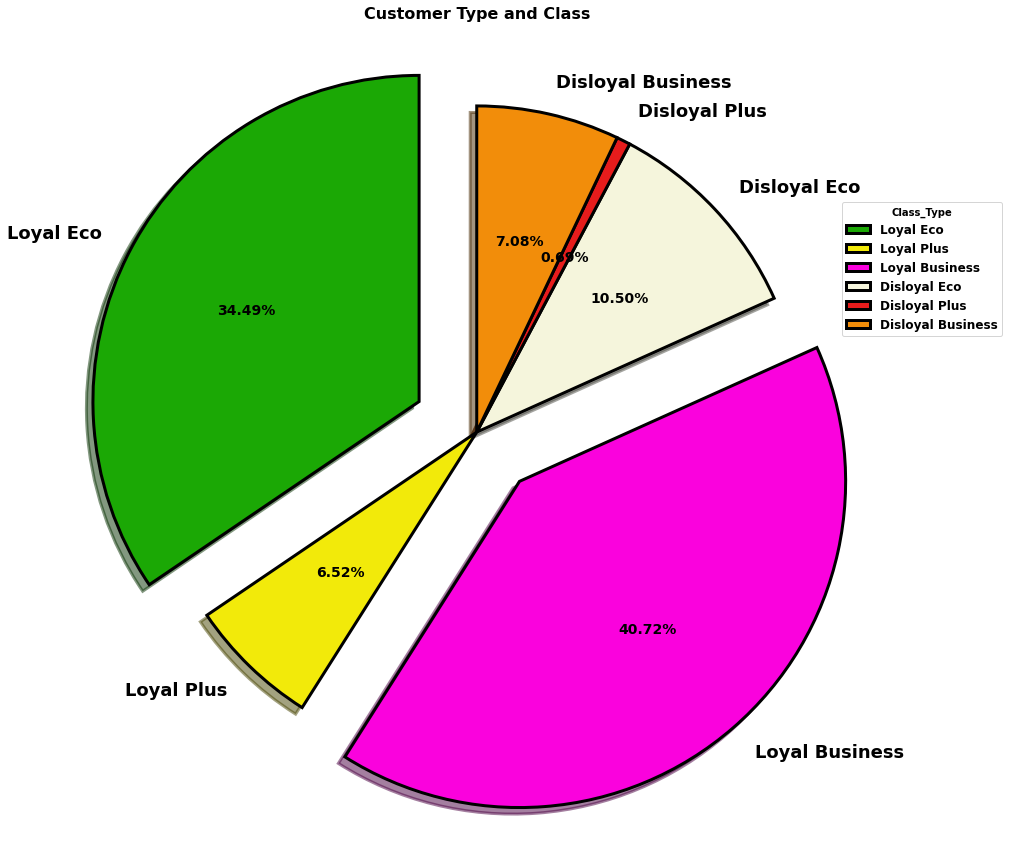

In [40]:
#Grafico de Pizza Total
##222222 no google para ver as cores hexadecimais
genero = ['Loyal Eco', 'Loyal Plus', 'Loyal Business', 'Disloyal Eco', 'Disloyal Plus', 'Disloyal Business'] 
  
data = [34.49, 6.52, 40.72, 10.5,  0.69, 7.08] 
  
colors = ['#1ba805','#f2ea0a','#fa02dd' , 'beige' ,'#e61c1c', '#f28d0a' ]
 
explode = (0.2 ,0 , 0.2, 0, 0, 0)
wp = { 'linewidth' : 3, 'edgecolor' : "black" } 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.2f}%".format(pct, absolute) 
fig3, ax = plt.subplots(figsize =(15, 15)) 
wedges, texts, autotexts = ax.pie(data,  
                                  autopct = lambda pct: func(pct, data), 
                                  labels = genero, 
                                  explode = explode,
                                  colors= colors,
                                  shadow = True, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black", fontsize=18)) 
ax.legend(wedges, genero, fontsize = 12,
          title ="Class_Type", 
          loc ="center left", 
          bbox_to_anchor =(0.94, 0.3, 0.4, 0.8)) 
  
plt.setp(autotexts, size = 14, weight ="bold") 
ax.set_title("Customer Type and Class", loc= 'center', fontsize = 16, color = 'black') 
plt.show() 
fig3.savefig("pizza_total.png")

### Concluisse que dos passageiros Frequentes tanto Mulheres como Homens mais viajam pela classe Business e dos mais Infrequentes tanto Homens como mulheres viajam mais pelas classes Econômicas.

In [51]:
train.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

<Figure size 1440x1440 with 0 Axes>

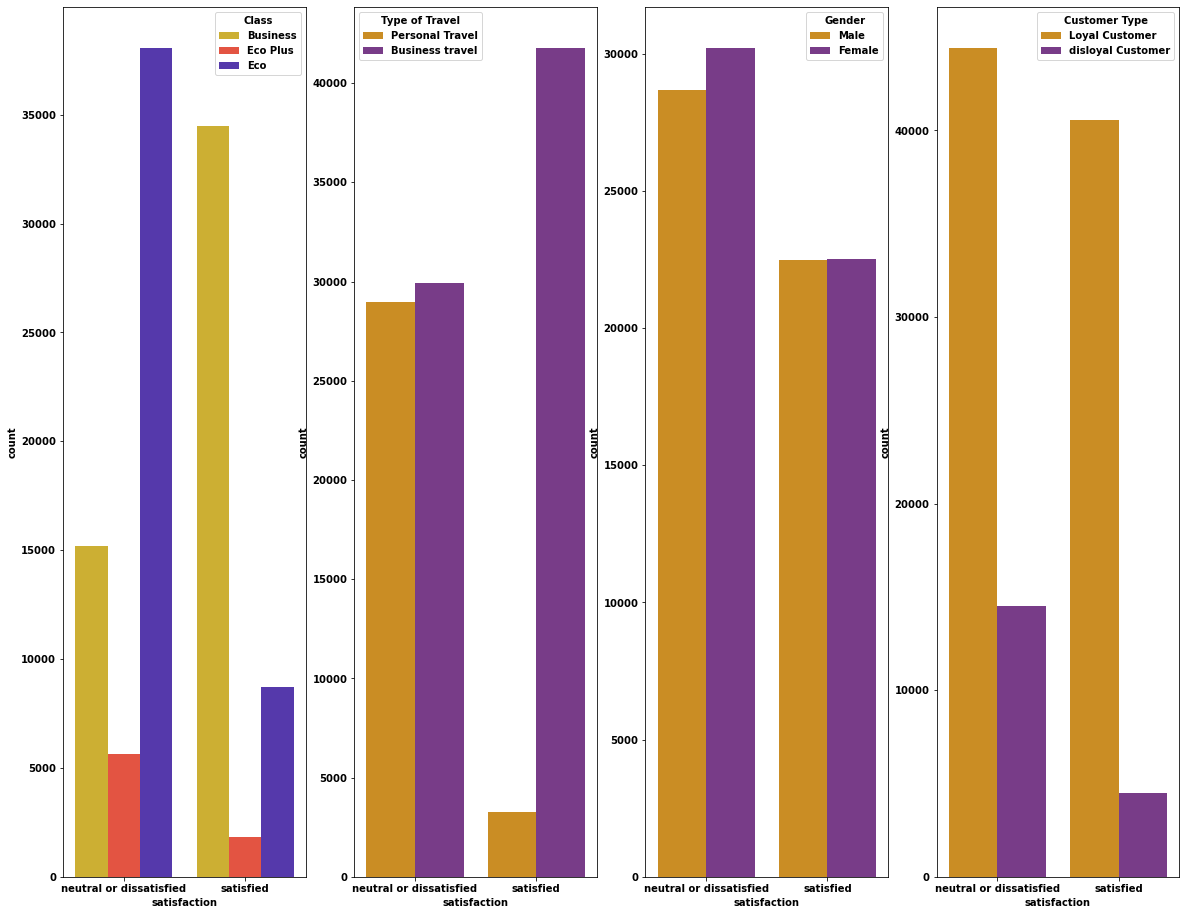

In [52]:
#Satisfação pelo Gênero, Classe e Tipo de Viagem
color=['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap','CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b','tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight','twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter','winter_r']
colour_palette=color[np.random.randint(len(color))]
plt.figure(figsize=(20,20))
fig13,ax =plt.subplots(1,4)
fig13.set_figwidth(20)
fig13.set_figheight(16)
sns.countplot(x='satisfaction',hue='Class',hue_order=['Business','Eco Plus','Eco'],data=train
              ,ax=ax[0],palette=colour_palette)
sns.countplot(x='satisfaction',hue='Type of Travel',data=train,ax=ax[1],palette=colour_palette)
sns.countplot(x='satisfaction',hue='Gender',data=train,ax=ax[2],palette=colour_palette)
sns.countplot(x='satisfaction',hue='Customer Type',data=train,ax=ax[3],palette=colour_palette)
fig13.savefig("s_g_t_c.png")

In [53]:
print(train_mod['Type_Travel'].value_counts())
print(train_mod['Customer_Type'].value_counts())
print(train_mod['Class'].value_counts())

Business travel    71655
Personal Travel    32249
Name: Type_Travel, dtype: int64
Loyal Customer       84923
disloyal Customer    18981
Name: Customer_Type, dtype: int64
Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64


In [54]:
#Gráfico de pizza para satisfeito e insatisfeito
m = train_mod.query ("Gender == 'Female'").count()
h = train_mod.query ("Gender == 'Male'").count()
m_s = train_mod.query ("Gender == 'Female' & satisfaction == 1").count()
m_ins = train_mod.query ("Gender == 'Female' & satisfaction == 0").count()
h_s = train_mod.query ("Gender == 'Male'  & satisfaction == 1").count()
h_ins = train_mod.query ("Gender == 'Male' & satisfaction == 0").count()
print('O percentual de Mulher Satisfeita é:',round((m_s['satisfaction']/m['satisfaction'])*100,2), '%')
print('O percentual de Mulher Insatisfeita é:',round((m_ins['satisfaction']/m['satisfaction'])*100,2), '%')
print('O percentual de Homem Satisfeito é:',round((h_s['satisfaction']/h['satisfaction'])*100,2), '%')
print('O percentual de Homem Insatisfeito é:',round((h_ins['satisfaction']/h['satisfaction'])*100,2), '%')

O percentual de Mulher Satisfeita é: 42.74 %
O percentual de Mulher Insatisfeita é: 57.26 %
O percentual de Homem Satisfeito é: 43.95 %
O percentual de Homem Insatisfeito é: 56.05 %


####  Fica mostrado que a maioria dos passageiros insatisfeitos viajam pela Classe Econômica e a viagem é à negócio.
#### A satisfação de homem e mulher é bascamente igual, o gênero não altera a análise.
#### E os passageiros mais satisfeitos são da classe Business e que viajam à trabalho também.

In [55]:
# Quais notas mais influênciam na satisfação?

![satisfacaoratings.jpg](satisfacaoratings.jpg)

In [56]:
# Filtrando pela Classe para saber a influência entre Business e Eco
s_classe = train_mod[['Class','Wifi', 'D_A_Time', 'Online_Booking', 'Gate_Loc',
'F_and_D', 'On_Boarding', 'Seat_Comfort','Entertainment', 'Service', 'Leg_Space', 'Baggage_Handling',
'Checkin_Service', 'Inflight_Service', 'Cleanliness'
                     ]]

In [57]:
filtro_classe = s_classe.query ("Class == 'Business'") 
filtro_classe.describe()

,Wifi,D_A_Time,Online_Booking,Gate_Loc,F_and_D,On_Boarding,Seat_Comfort,Entertainment,Service,Leg_Space,Baggage_Handling,Checkin_Service,Inflight_Service,Cleanliness
count,49665.000000,49665.000000,49665.000000,49665.000000,49665.000000,49665.000000,49665.000000,49665.000000,49665.000000,49665.000000,49665.000000,49665.000000,49665.000000,49665.000000
mean,2.775315,2.905910,2.913964,2.982926,3.323165,3.716541,3.760858,3.635437,3.679472,3.644498,3.842907,3.519178,3.844579,3.477600
std,1.426234,1.505462,1.473833,1.365592,1.282434,1.218758,1.194775,1.241330,1.191516,1.221331,1.119837,1.184784,1.118154,1.237594
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [58]:
#Filtro pela Classe Eco.
f_eco = s_classe.query ("Class == 'Eco'") 
f_eco.describe()

,Wifi,D_A_Time,Online_Booking,Gate_Loc,F_and_D,On_Boarding,Seat_Comfort,Entertainment,Service,Leg_Space,Baggage_Handling,Checkin_Service,Inflight_Service,Cleanliness
count,46745.000000,46745.000000,46745.000000,46745.000000,46745.000000,46745.000000,46745.000000,46745.000000,46745.000000,46745.000000,46745.000000,46745.000000,46745.000000,46745.000000
mean,2.675067,3.199123,2.605241,2.971954,3.086277,2.812985,3.138838,3.098256,3.120355,3.085720,3.450551,3.122002,3.463921,3.108097
std,1.219367,1.536902,1.300010,1.181611,1.362399,1.317635,1.361488,1.364570,1.312313,1.339713,1.202232,1.300969,1.197037,1.354981
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000
50%,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Comparando as médias, percebe-se que as notas da classe Executiva são maiores, o que indica um serviço melhor prestado na classe executiva em comparação com a classe econômica

In [59]:
#Variáveis mais relevantes para a Satisfação
s_notas = train_mod[['satisfaction','Wifi', 'D_A_Time', 'Online_Booking', 'Gate_Loc',
'F_and_D', 'On_Boarding', 'Seat_Comfort','Entertainment', 'Service', 'Leg_Space', 'Baggage_Handling',
'Checkin_Service', 'Inflight_Service', 'Cleanliness'
]]

In [60]:
s_filtrado = s_notas.query ("satisfaction == 1") 
s_filtrado.describe()

,satisfaction,Wifi,D_A_Time,Online_Booking,Gate_Loc,F_and_D,On_Boarding,Seat_Comfort,Entertainment,Service,Leg_Space,Baggage_Handling,Checkin_Service,Inflight_Service,Cleanliness
count,45025.0,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000
mean,1.0,3.161288,2.970305,3.031582,2.977879,3.521310,4.027474,3.966530,3.964931,3.857324,3.822143,3.966396,3.646041,3.969461,3.744342
std,0.0,1.588697,1.552213,1.575306,1.374244,1.236187,1.191609,1.142077,1.076907,1.127130,1.175515,1.099607,1.158732,1.091486,1.142247
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,1.0,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000
50%,1.0,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,1.0,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,1.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [61]:
s_filtrado.mean() > 3.8

satisfaction        False
Wifi                False
D_A_Time            False
Online_Booking      False
Gate_Loc            False
F_and_D             False
On_Boarding          True
Seat_Comfort         True
Entertainment        True
Service              True
Leg_Space            True
Baggage_Handling     True
Checkin_Service     False
Inflight_Service     True
Cleanliness         False
dtype: bool

<AxesSubplot:title={'center':"Distribution of 'Online boarding'"}, xlabel='satisfaction', ylabel='count'>

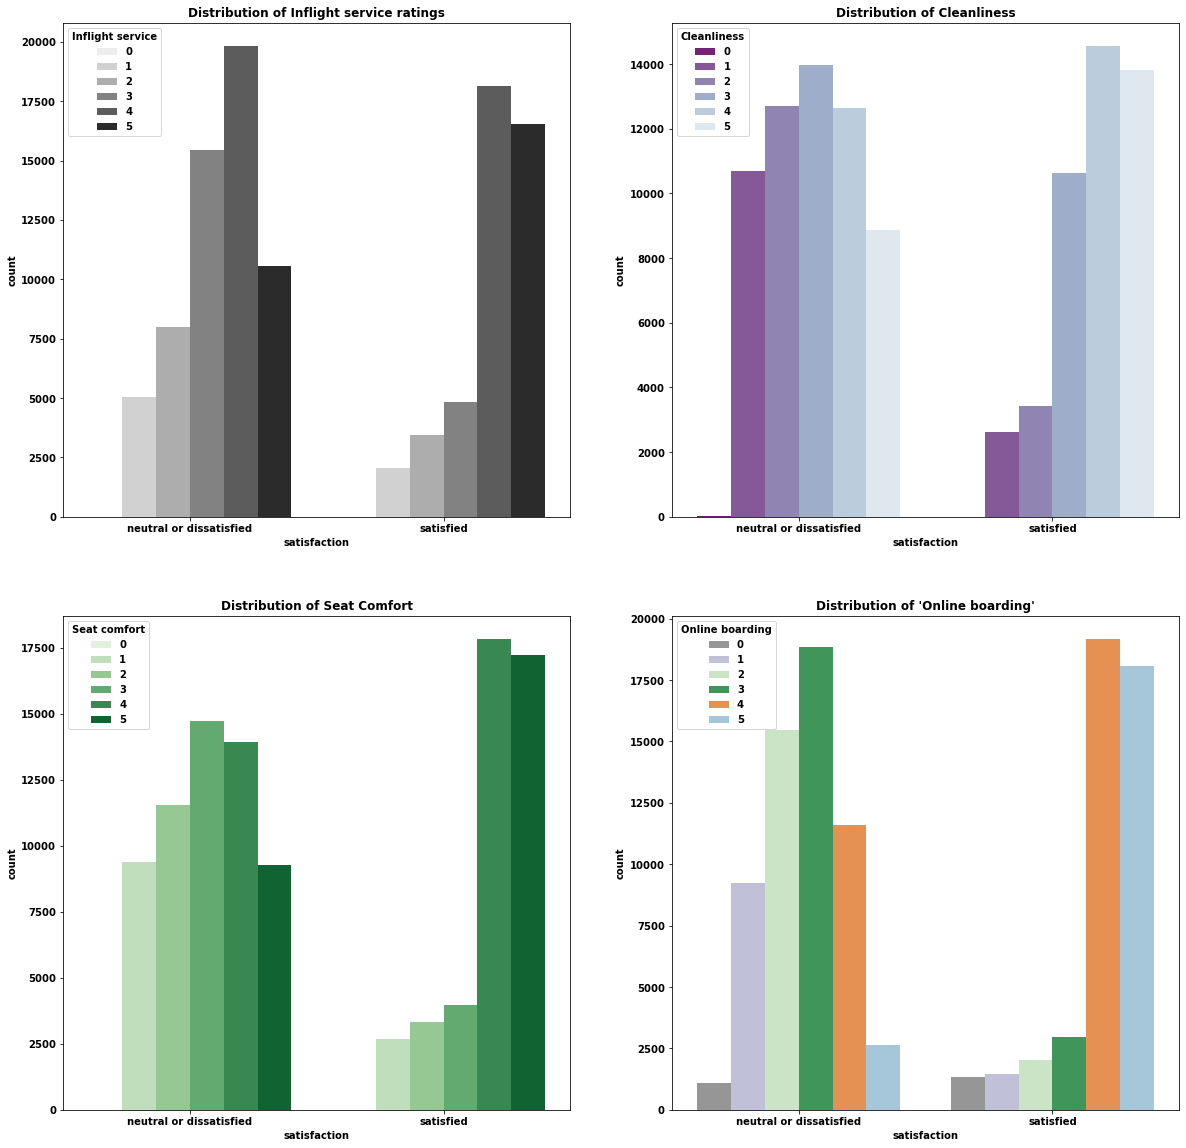

In [62]:
#Outras analises com os principais fatores de satisfação, Ratings x Satisfaction (Top 8)
fig14,ax=plt.subplots(2,2)
fig14.set_figwidth(20)
fig14.set_figheight(20)
ax[0][0].set_title("Distribution of Inflight service ratings")
sns.countplot(x='satisfaction',hue='Inflight service',data=train,ax=ax[0][0],palette=color[np.random.randint(len(color))])
ax[0][1].set_title("Distribution of Cleanliness")
sns.countplot(x='satisfaction',hue='Cleanliness',data=train,ax=ax[0][1],palette=color[np.random.randint(len(color))])
ax[1][0].set_title("Distribution of Seat Comfort")
sns.countplot(x='satisfaction',hue='Seat comfort',data=train,ax=ax[1][0],palette=color[np.random.randint(len(color))])
ax[1][1].set_title("Distribution of 'Online boarding'")
sns.countplot(x='satisfaction',hue='Online boarding',data=train,ax=ax[1][1],palette=color[np.random.randint(len(color))])


<AxesSubplot:title={'center':'Distribution of Leg room service'}, xlabel='satisfaction', ylabel='count'>

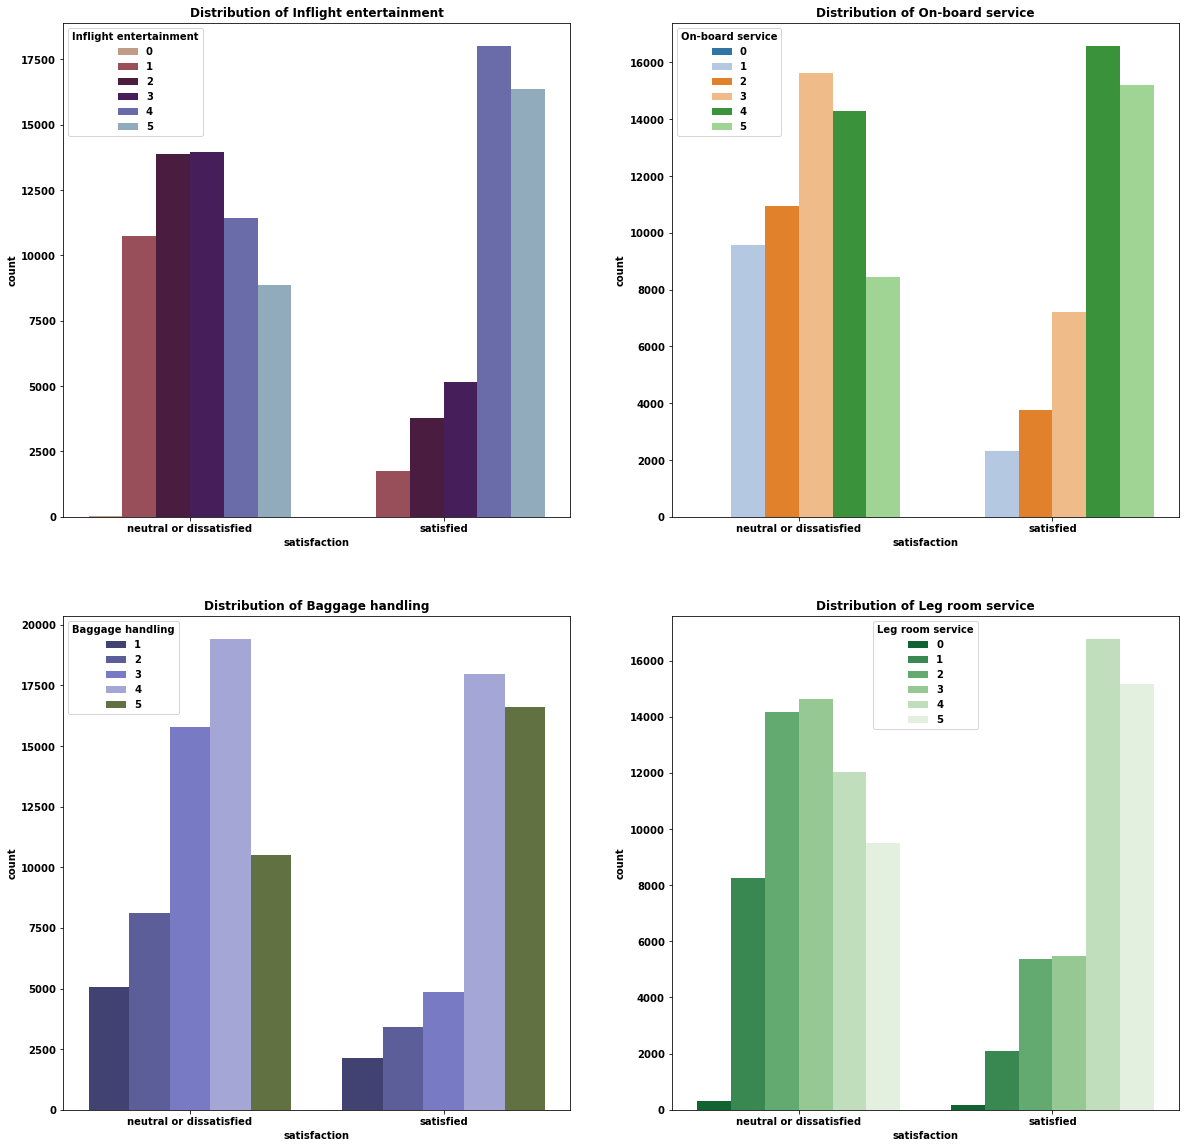

In [63]:
fig16,ax=plt.subplots(2,2)
fig16.set_figwidth(20)
fig16.set_figheight(20)
ax[0][0].set_title("Distribution of Inflight entertainment")
sns.countplot(x='satisfaction',hue='Inflight entertainment',data=train,ax=ax[0][0],palette=color[np.random.randint(len(color))])
ax[0][1].set_title("Distribution of On-board service")
sns.countplot(x='satisfaction',hue='On-board service',data=train,ax=ax[0][1],palette=color[np.random.randint(len(color))])
ax[1][0].set_title("Distribution of Baggage handling")
sns.countplot(x='satisfaction',hue='Baggage handling',data=train,ax=ax[1][0],palette=color[np.random.randint(len(color))])
ax[1][1].set_title("Distribution of Leg room service")
sns.countplot(x='satisfaction',hue='Leg room service',data=train,ax=ax[1][1],palette=color[np.random.randint(len(color))])

<AxesSubplot:title={'center':'Distribution of Ease of Online booking'}, xlabel='satisfaction', ylabel='count'>

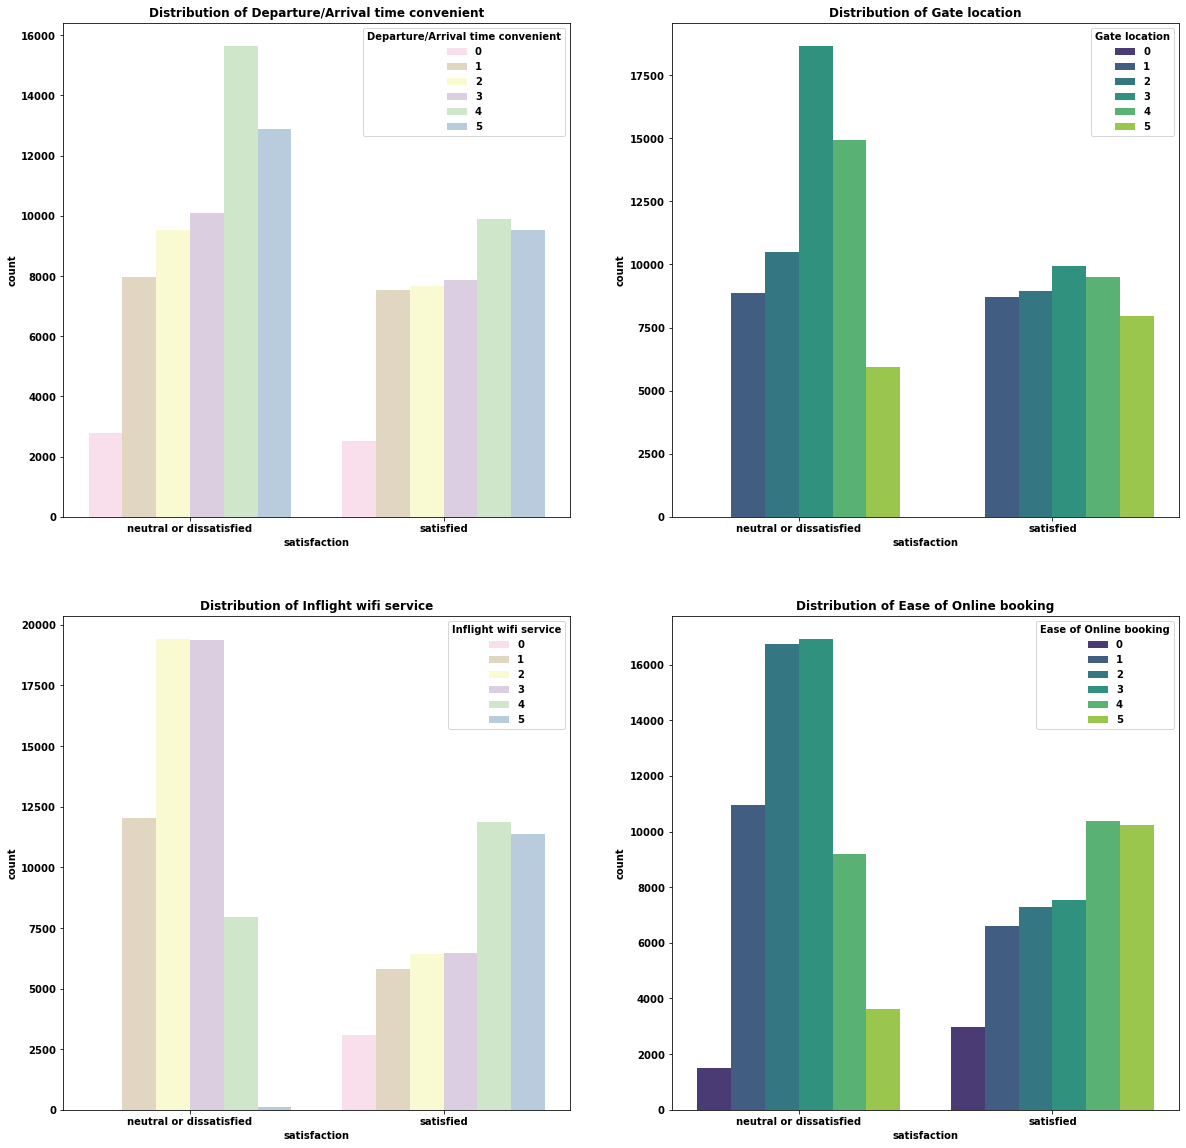

In [64]:
# Variáveis que menos influenciam na satisfação (Satisfaction x Ratings Less)
fig15,ax=plt.subplots(2,2)
fig15.set_figwidth(20)
fig15.set_figheight(20)
ax[0][0].set_title("Distribution of Departure/Arrival time convenient")
sns.countplot(x='satisfaction',hue='Departure/Arrival time convenient',data=train,ax=ax[0][0],palette=color[np.random.randint(len(color))])
ax[0][1].set_title("Distribution of Gate location")
sns.countplot(x='satisfaction',hue='Gate location',data=train,ax=ax[0][1],palette=color[np.random.randint(len(color))])
ax[1][0].set_title("Distribution of Inflight wifi service")
sns.countplot(x='satisfaction',hue='Inflight wifi service',data=train,ax=ax[1][0],palette=color[np.random.randint(len(color))])
ax[1][1].set_title("Distribution of Ease of Online booking")
sns.countplot(x='satisfaction',hue='Ease of Online booking',data=train,ax=ax[1][1],palette=color[np.random.randint(len(color))])

#### Os fatores que mais influênciam na satisfação por média são: 
#### Comida_Bebida,  Embarque_Online,  Conforto_Assento,  Entretenimento_Voo,  Serviço_Bordo,                                        
#### Espaço_Pés, Manuseio_Bagagem, Serviço_Checkin, Serviço_Voo, Limpeza                

### Regressão Logística 

In [65]:
#importando pacotes
from sklearn.model_selection import train_test_split #separa teste e treinamento
from sklearn.metrics import (confusion_matrix,accuracy_score) #matriz confusão
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score #f1-score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score #area sob curva roc
from sklearn.metrics import roc_curve #curva roc
from sklearn.metrics import confusion_matrix #matriz de confusão
from matplotlib import pyplot #grafico

In [66]:
#Tratando os valores e transformando em binários.
train_mod['Gender'].replace(['Female', 'Male'],[0,1], inplace= True)
test_mod['Gender'].replace(['Female', 'Male'],[0,1], inplace= True)
train_mod['Customer_Type'].replace(['disloyal Customer', 'Loyal Customer'],[0,1], inplace= True)
test_mod['Customer_Type'].replace(['disloyal Customer', 'Loyal Customer'],[0,1], inplace= True)
train_mod['Type_Travel'].replace(['Personal Travel', 'Business travel'],[0,1], inplace= True)
test_mod['Type_Travel'].replace(['Personal Travel', 'Business travel'],[0,1], inplace= True)


In [67]:
# implying One Hot Encoder method to the Class column
from sklearn.preprocessing import OneHotEncoder
ohe_train = OneHotEncoder()
transformed_train = ohe_train.fit_transform(train_mod["Class"].values.reshape(-1,1)).toarray()
df_train_class = pd.DataFrame(transformed_train, columns=["Business", "Eco", "Eco_Plus"])
train_mod = pd.concat([df_train_class, train_mod], axis=1)
#train_mod.drop(["Class"], axis=1, inplace=True)


In [68]:
# implying One Hot Encoder method to the Class column
from sklearn.preprocessing import OneHotEncoder
ohe_train = OneHotEncoder()
transformed_train = ohe_train.fit_transform(test_mod["Class"].values.reshape(-1,1)).toarray()
df_train_class = pd.DataFrame(transformed_train, columns=["Business", "Eco", "Eco_Plus"])
test_mod = pd.concat([df_train_class, test_mod], axis=1)
#aps_teste.drop(["Class"], axis=1, inplace=True)


In [69]:
#Definindo as vars dependente e independente
Xtrain = train_mod[['Business', 'Eco', 'Eco_Plus', 'Gender', 'Customer_Type', 'Age','Type_Travel','Class', 'Distance_Miles', 
'Wifi', 'D_A_Time', 'Online_Booking','Gate_Loc', 'F_and_D', 'On_Boarding', 'Seat_Comfort', 'Entertainment',
'Service', 'Leg_Space', 'Baggage_Handling', 'Checkin_Service', 'Inflight_Service', 'Cleanliness', 'Delay_Dep'
               ]]
ytrain = train_mod[['satisfaction']]

In [70]:
#Normalização das colunas com minimax
#Normalizando os dados
#from sklearn.preprocessing import MinMaxScaler
#mms = MinMaxScaler()
#mms.fit(aps_regressao)
#data_transformed = mms.transform(aps_regressao)

### Optamos por não normalizar os dados, visto que a acurácia aumentou em apenas 2% com a normalização, logo não mostrou relevãncia significativa

In [71]:
#Tabela de regressão (via statsmodel)
log_reg = smf.logit ("satisfaction ~Gender+Customer_Type+Age+Type_Travel+Business+Eco+Eco_Plus+Distance_Miles+Wifi+D_A_Time+Online_Booking\
+Gate_Loc+F_and_D+On_Boarding+Seat_Comfort+Entertainment+Service+Leg_Space+Baggage_Handling+Checkin_Service+Inflight_Service\
+Cleanliness+Delay_Dep", 
                     data = train_mod).fit()
log_reg.summary()

         Current function value: 0.334337
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           satisfaction   No. Observations:               103904
Model:                          Logit   Df Residuals:                   103881
Method:                           MLE   Df Model:                           22
Date:                Fri, 15 Jul 2022   Pseudo R-squ.:                  0.5114
Time:                        17:33:23   Log-Likelihood:                -34739.
converged:                      False   LL-Null:                       -71094.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -8.3396        nan        nan        nan         nan         nan
Gender               0.0419      0.019      2.153      0.031       0.004       0.080
Customer_Type        2.0301      0.030     67.978      0.000       1.972       2.089
Age                 -0.0082      0.001    -11.554      0.000      -0.010      -0.007
Type_Travel          2.7141      0.031     86.485      0.000       2.653       2.776
Business            -2.2483        nan        nan        nan         nan         nan
Eco                 -2.9872        nan        nan        nan         nan         nan
Eco_Plus            -3.1042        nan        nan        nan         nan         nan
Distance_Miles   -1.625e-05   1.13e-05     -1.439      0.150   -3.84e-05    5.88e-06
Wifi                 0.3948      0.011     34.486      0.000       0.372       0.417
D_A_Time            -0.1243      0.008    -15.155      0.000      -0.140      -0.108
Online_Booking      -0.1421      0.011    -12.553      0.000      -0.164      -0.120
Gate_Loc             0.0289      0.009      3.154      0.002       0.011       0.047
F_and_D             -0.0261      0.011     -2.447      0.014      -0.047      -0.005
On_Boarding          0.6118      0.010     59.861      0.000       0.592       0.632
Seat_Comfort         0.0662      0.011      5.930      0.000       0.044       0.088
Entertainment        0.0645      0.014      4.534      0.000       0.037       0.092
Service              0.3013      0.010     29.628      0.000       0.281       0.321
Leg_Space            0.2523      0.009     29.607      0.000       0.236       0.269
Baggage_Handling     0.1334      0.011     11.687      0.000       0.111       0.156
Checkin_Service      0.3229      0.009     37.774      0.000       0.306       0.340
Inflight_Service     0.1220      0.012     10.155      0.000       0.098       0.146
Cleanliness          0.2216      0.012     18.358      0.000       0.198       0.245
Delay_Dep           -0.0044      0.000    -16.954      0.000      -0.005      -0.004
====================================================================================
"""

### P-valor = 0,05 ou 5%
#### Como Insight da Tabela de Logit Regression Results, temos que a variável Distância do Voo é insignificante p-valor = 15%, assim como o gênero = 3,1% (possui baixa relevência), assim como ECO, ECOPLUS E BUSINESS.

In [72]:
#Tabela de regressão (via statsmodel) Tirando alguns insights e removendo as variáveis insignificantes
log_reg1 = smf.logit ("satisfaction ~C(Gender, Treatment(0))+C(Customer_Type, Treatment(0))+C(Type_Travel, Treatment(0))\
+C(Class, Treatment('Business'))+Age+Wifi+D_A_Time+Online_Booking\
+Gate_Loc+F_and_D+On_Boarding+Seat_Comfort+Entertainment+Service+Leg_Space+Baggage_Handling+Checkin_Service+Inflight_Service\
+Cleanliness+Delay_Dep", 
                     data = train_mod).fit()
log_reg1.summary()

Optimization terminated successfully.
         Current function value: 0.334346
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           satisfaction   No. Observations:               103904
Model:                          Logit   Df Residuals:                   103882
Method:                           MLE   Df Model:                           21
Date:                Fri, 15 Jul 2022   Pseudo R-squ.:                  0.5114
Time:                        17:33:25   Log-Likelihood:                -34740.
converged:                       True   LL-Null:                       -71094.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                     -10.6017      0.092   -115.070      0.000     -10.782     -10.421
C(Gender, Treatment(0))[T.1]                    0.0420      0.019      2.157      0.031       0.004       0.080
C(Customer_Type, Treatment(0))[T.1]             2.0189      0.029     70.089      0.000       1.962       2.075
C(Type_Travel, Treatment(0))[T.1]               2.7088      0.031     86.919      0.000       2.648       2.770
C(Class, Treatment('Business'))[T.Eco]         -0.7273      0.024    -29.903      0.000      -0.775      -0.680
C(Class, Treatment('Business'))[T.Eco Plus]    -0.8420      0.040    -20.898      0.000      -0.921      -0.763
Age                                            -0.0081      0.001    -11.485      0.000      -0.010      -0.007
Wifi                                            0.3957      0.011     34.609      0.000       0.373       0.418
D_A_Time                                       -0.1245      0.008    -15.182      0.000      -0.141      -0.108
Online_Booking                                 -0.1424      0.011    -12.582      0.000      -0.165      -0.120
Gate_Loc                                        0.0290      0.009      3.169      0.002       0.011       0.047
F_and_D                                        -0.0259      0.011     -2.428      0.015      -0.047      -0.005
On_Boarding                                     0.6114      0.010     59.843      0.000       0.591       0.631
Seat_Comfort                                    0.0659      0.011      5.906      0.000       0.044       0.088
Entertainment                                   0.0644      0.014      4.530      0.000       0.037       0.092
Service                                         0.3011      0.010     29.618      0.000       0.281       0.321
Leg_Space                                       0.2519      0.009     29.579      0.000       0.235       0.269
Baggage_Handling                                0.1337      0.011     11.711      0.000       0.111       0.156
Checkin_Service                                 0.3228      0.009     37.766      0.000       0.306       0.340
Inflight_Service                                0.1223      0.012     10.187      0.000       0.099       0.146
Cleanliness                                     0.2216      0.012     18.352      0.000       0.198       0.245
Delay_Dep                                      -0.0044      0.000    -16.959      0.000      -0.005      -0.004
===============================================================================================================
"""

In [73]:
#Cálculo da odds ratio
odds_ratios = pd.DataFrame(
    {
        "OR": log_reg1.params,
        "Lower CI": log_reg1.conf_int()[0],
        "Upper CI": log_reg1.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

,OR,Lower CI,Upper CI
Intercept,0.000025,0.000021,0.000030
"C(Gender, Treatment(0))[T.1]",1.042846,1.003840,1.083369
"C(Customer_Type, Treatment(0))[T.1]",7.529842,7.116518,7.967170
"C(Type_Travel, Treatment(0))[T.1]",15.011881,14.122358,15.957433
"C(Class, Treatment('Business'))[T.Eco]",0.483199,0.460704,0.506792
"C(Class, Treatment('Business'))[T.Eco Plus]",0.430867,0.398153,0.466269
Age,0.991907,0.990533,0.993284
Wifi,1.485429,1.452512,1.519092
D_A_Time,0.882914,0.868834,0.897222
Online_Booking,0.867259,0.848230,0.886714


#### Conclui-se pelo ODDS que a chance de uma mulher está mais satisfeita que um homem é 1,05 (praticamente a mesma como vimos em todas nossas análises que não há diferença no Gênero)
#### A chance de um passageiro Frequente está satisfeito é 7,53 vezes maior do que o não frequente;
#### A chance de um passageiro que viaja à negócios está satisfeito é 15 vezes maior do que o passageiro que faz uma viagem pessoal. 
#### A chance de um passageiro que viaja pela Classe Executiva está satisfeito é 2,07 vezes maior do que o da Classe Econômica e 2,32 vezes maior do que o da Eco Plus

In [74]:
#Trabalhando na base de Teste
#Definindo as variáveis Input e Target
Xtest = test_mod[['Business', 'Eco', 'Eco_Plus', 'Gender', 'Customer_Type', 'Age','Type_Travel','Class', 'Distance_Miles', 
'Wifi', 'D_A_Time', 'Online_Booking','Gate_Loc', 'F_and_D', 'On_Boarding', 'Seat_Comfort', 'Entertainment',
'Service', 'Leg_Space', 'Baggage_Handling', 'Checkin_Service', 'Inflight_Service', 'Cleanliness', 'Delay_Dep'
               ]]
ytest = test_mod[['satisfaction']]

In [75]:
#Iniciar o processo de modelagem
#testando o modelo na base de teste
prob = log_reg.predict(Xtest)
y_pred = list(map(round, prob))

In [76]:
#transformando y_test em array
array_ytest  = np.asarray(ytest)
array_ytest = array_ytest.reshape(array_ytest.shape[0])
array_ytest.shape

(25976,)

In [77]:
#Calculando a matriz de confusão
logreg = log_reg.predict(test_mod)
crosstab = pd.crosstab(array_ytest,y_pred , rownames=['Real'], colnames=['Predito'], margins=True)
crosstab

Predito,0,1,All
Real,,,
0,13146,1427,14573
1,1911,9492,11403
All,15057,10919,25976


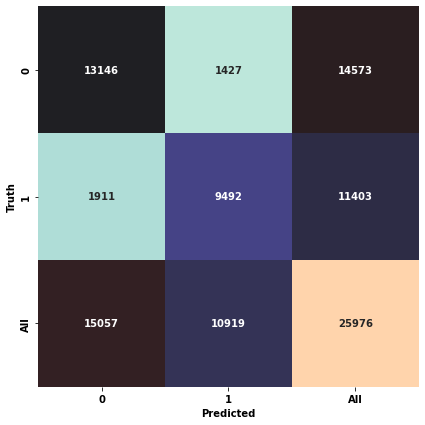

In [78]:
#Matriz de Confusão.
fig2 = plt.figure(figsize = (12,7))
sns.heatmap(crosstab , square=True, annot=True, cmap='icefire', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Truth')
fig2.savefig("Crosstab.png")

In [88]:
#Calculando as métricas de validação
acuracia = accuracy_score(ytest, y_pred)
precision = precision_score(ytest, y_pred)
recall = recall_score(ytest, y_pred)

print ('Acurácia:',round(acuracia*100,2),'%')
print('Precision:',round(precision*100,2),'%') 
print ('Recall:', round(recall*100,2),'%')


Acurácia: 87.15 %
Precision: 86.93 %
Recall: 83.24 %


In [81]:
#Calculando o KS
#Base com valorres preditos e a resposta real
prob1 = pd.DataFrame(prob, columns=['p'])
y_teste = pd.DataFrame(ytest, columns=['satisfaction'])
base = prob1.copy()
base['y'] = y_teste
base.head()

,p,y
0,0.932275,1
1,0.870660,1
2,0.029512,0
3,0.310708,1
4,0.075638,1


In [82]:
from scipy.stats import ks_2samp

In [83]:
#Cálculo do K-S 
ks_2samp(base.loc[base.y==0,"p"], base.loc[base.y==1,"p"])

KstestResult(statistic=0.7349196125101616, pvalue=0.0)

In [84]:
#Cálculo de AUC
# calculate AUC
auc = roc_auc_score(ytest, prob)
print('AUC:', round(auc*100,2),'%')

AUC: 92.55 %


In [85]:
#Estimando as probabilidades para gerar a curva ROC
#logreg_prob = log_regression.predict_proba(x_teste)
#probs = logreg_prob[:, 1]
rfp, rvp,lim = roc_curve(ytest, prob) #Gera os valores de falso positivo e verdadeiro positivo

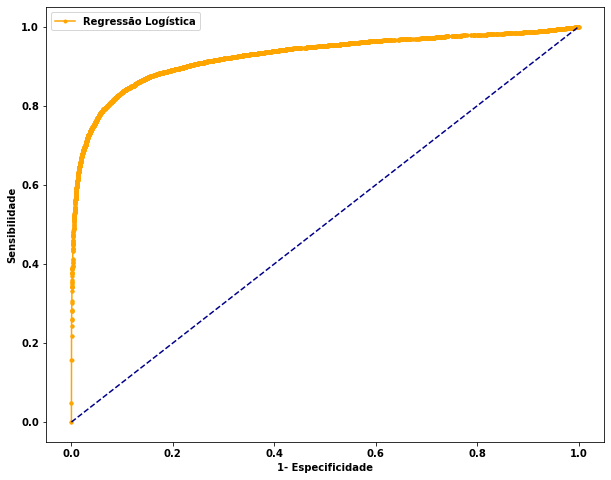

AUC-ROC : 0.925506131848141


In [86]:
#Gerando a curva ROC
# gráfico da curva roc
fig3, ax = plt.subplots(figsize=(10,8))
pyplot.plot(rfp, rvp, marker='.', label='Regressão Logística',color="orange") 
pyplot.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
# axis labels
pyplot.xlabel('1- Especificidade')
pyplot.ylabel('Sensibilidade')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
print("AUC-ROC :",auc)
fig3.savefig("AUC-ROC.png")

### A regressão se mostrou muito boa, onde o AUC > 0.9 são ótimos, nosso AUC = 0.925, logo apresenta um Good fit, Bom modelo ajustado entre True Positive Rate (sensibilidade) e o False Positive Rate (Especifidade)